In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy

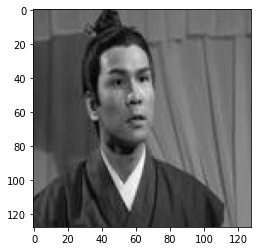

In [ ]:
img = cv2.imread('/content/drive/MyDrive/XuLyAnh/DoanDaiHiep.jpg',0)
plt.imshow(img,cmap="gray")
plt.show()

Tang giam do xam

In [ ]:
img1 = copy.copy(img)
#muc dich de luu tru hinh anh goc ban dau

In [ ]:
def tanggiamdoxam(image,c):
  m,n = image.shape
  image1 = image
  for i in np.arange(0,m):
    for j in np.arange(0,n):
      ok = image1[i,j]+c
      if ok>255:
        ok= 255
      if ok<0:
        ok= 0
      image1[i,j]=ok   
  return image1

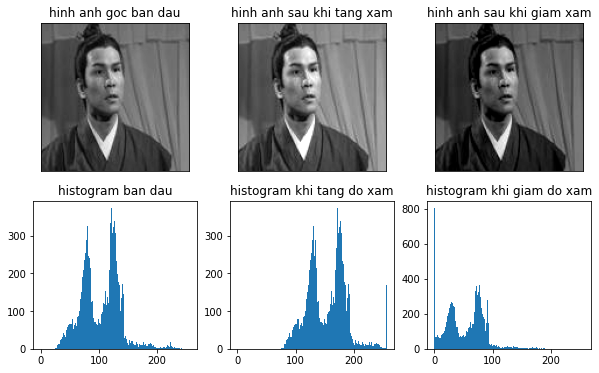

In [ ]:
imgTangXam = copy.copy(img1)
imgGiamXam = copy.copy(img1)
imgTangXam = tanggiamdoxam(imgTangXam,50)
imgGiamXam = tanggiamdoxam(imgGiamXam,-50)

plt.figure(figsize=(10,6))
plt.subplot(231) , plt.imshow(img1,cmap="gray"), plt.title("hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(232) , plt.imshow(imgTangXam,cmap="gray"), plt.title("hinh anh sau khi tang xam")
plt.xticks([]), plt.yticks([])
plt.subplot(233) , plt.imshow(imgGiamXam,cmap="gray"), plt.title("hinh anh sau khi giam xam")
plt.xticks([]), plt.yticks([])
plt.subplot(234) , plt.hist(img1.ravel(),256,[0,256]), plt.title("histogram ban dau")
plt.subplot(235) , plt.hist(imgTangXam.ravel(),256,[0,256]), plt.title("histogram khi tang do xam")
plt.subplot(236) , plt.hist(imgGiamXam.ravel(),256,[0,256]), plt.title("histogram khi giam do xam")
plt.show()

**Tach Nguong**
Phuong phap nay chi phu hop de xu dung anh den trang

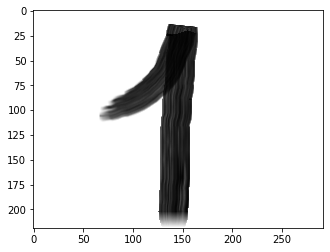

In [ ]:
image0 = cv2.imread('/content/drive/MyDrive/XuLyAnh/DenTrang.jpg')
image = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap="gray")
plt.show()

In [ ]:
image1 = copy.copy(image)

In [ ]:
def tachnguong(image,max,min,thetha):
  m,n = image.shape
  for i in np.arange(0,m):
    for j in np.arange(0,n):
      if image[i,j]>=thetha:
        image[i,j]=max
      else:
        image[i,j]=min
  return image

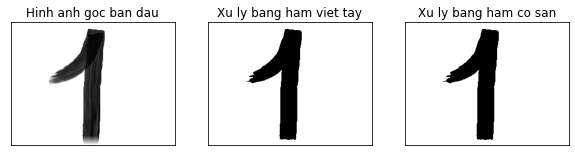

In [ ]:
#lay vi du trong truong hop nay chuyen doi thanh anh den trang
#gia xu thread bang 127
thresh = 127
imageH= copy.copy(image1)
imageT= copy.copy(image1)

imageT = tachnguong(imageT,255,0,thresh)
ret,imageH = cv2.threshold(imageH,thresh,255,cv2.THRESH_BINARY) # cac tham so lan luot la: image, thresh, max value, cac teachnique ( thresh binary, thresh binary....)

plt.figure(figsize=(10,6))
plt.subplot(131) , plt.imshow(image1,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(imageT,cmap="gray"), plt.title("Xu ly bang ham viet tay")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(imageH,cmap="gray"), plt.title("Xu ly bang ham co san")
plt.xticks([]), plt.yticks([])
plt.show()

BIEN DOI DO TUONG PHAN 
GIAN HISTOGRAM **bold text**

In [ ]:
def gianHis(image,lmin,lmax):
  m,n = image.shape
  image1 = image
  min = np.min(image)
  max = np.max(image)
  for i in np.arange(0,m):
    for j in np.arange(0,n):
      if image[i,j] <= min:
        image1[i,j]= lmin
      elif image[i,j] >= max:
        image1[i,j]= lmax
      else:
        image1[i,j] = (lmax-lmin)*((image1[i,j]-min)/(max-min))+lmin
  return image1


In [ ]:
I= np.array([
             [2,2,2,2,2],
             [2,4,4,5,2],
             [2,5,5,5,2],
             [2,4,4,5,2],
             [2,2,2,2,2]
])

In [ ]:
I1= copy.copy(I)

I2 = gianHis(I1,1,16)

print("I ban dau")
print(I)
print("Sau khi bien doi")
print(I2)

I ban dau
[[2 2 2 2 2]
 [2 4 4 5 2]
 [2 5 5 5 2]
 [2 4 4 5 2]
 [2 2 2 2 2]]
Sau khi bien doi
[[ 1  1  1  1  1]
 [ 1 11 11 16  1]
 [ 1 16 16 16  1]
 [ 1 11 11 16  1]
 [ 1  1  1  1  1]]


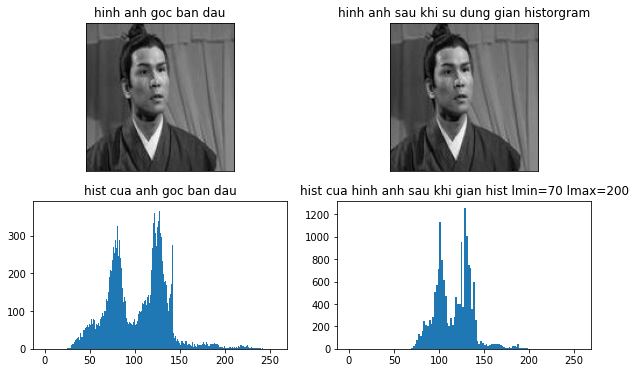

In [ ]:
img2 = copy.copy(img)
img21 = gianHis(img2,70,200)

plt.figure(figsize=(10,6))
plt.subplot(221) , plt.imshow(img1,cmap="gray"), plt.title("hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(222) , plt.imshow(img21,cmap="gray"), plt.title("hinh anh sau khi su dung gian historgram")
plt.xticks([]), plt.yticks([])
plt.subplot(223) , plt.hist(img1.ravel(),256,[0,256]),plt.title("hist cua anh goc ban dau")
plt.subplot(224) , plt.hist(img21.ravel(),130,[0,256]),plt.title("hist cua hinh anh sau khi gian hist lmin=70 lmax=200")

plt.show()

**CAN BANG HISTOGRAM**

In [ ]:
def canbangHist(image,new_level):
  m,n = image.shape
  TB = m*n/new_level
 
  vector = image.ravel()
  h = np.arange(0,256)
  
  #for nay gianh cho tinh h(g)
  for i in h:
    count =0
    for j in vector:
      if j==i:
        count= count +1
    h[i]= count

  t= np.arange(0,256)

  #for nay gianh cho tinh t(g)
  for i in t:
    if i==0:
      t[i]=h[i]
    else:
      t[i]= h[i]+t[i-1]

  #for nay de tinh f(g)
  g = np.arange(0,256)
  f= np.arange(0,256)
  for i in g:
    f[i]= np.max([0,np.round(t[i]/TB)-1])

  for i in vector:
    for j in g:
      if i == j:
        i= f[j]

  image1 = np.reshape(vector,(m,n))

  return image1



    


In [ ]:
I3 = np.array([
               [1,2,4,6,7],
               [2,1,3,4,5],
               [7,2,6,9,1],
               [4,1,2,1,2]
])

I4 =  copy.copy(I3)

I4 = canbangHist(I4,4)

print("Hinh anh goc ban dau")
print(I3)
print("Hinh anh sau khi bien doi")
print(I4)

Hinh anh goc ban dau
[[1 2 4 6 7]
 [2 1 3 4 5]
 [7 2 6 9 1]
 [4 1 2 1 2]]
Hinh anh sau khi bien doi
[[1 2 4 6 7]
 [2 1 3 4 5]
 [7 2 6 9 1]
 [4 1 2 1 2]]


nhan xet ham tren dang bị loi
cai này se dc fix sau

**BIEN DOI TUYEN TINH**

In [ ]:
def biendoiTuyenTinh(image,anpha,beta,gama,a,b):
  va= anpha*a
  vb= beta*b

  for i in np.arange(0,image.shape[0]):
    for j in np.arange(0,image.shape[1]):
      if image[i,j] <anpha:
        image[i,j]= a*anpha
      elif image[i,j]>=a and image[i,j]<b:
        image[i,j]= beta*(image[i,j]-anpha)+va
      else:
        image[i,j]= gama*(image[i,j]-b)+vb
  return image.astype(int)

#chú ý các tham số nhập đầu vào các bạn nhé
#0<=a,b <=255. 0<=a*anpha<=255 va 0<=beta*b<=255
#còn nhập khác sai thi k chịu đâu nhé :))

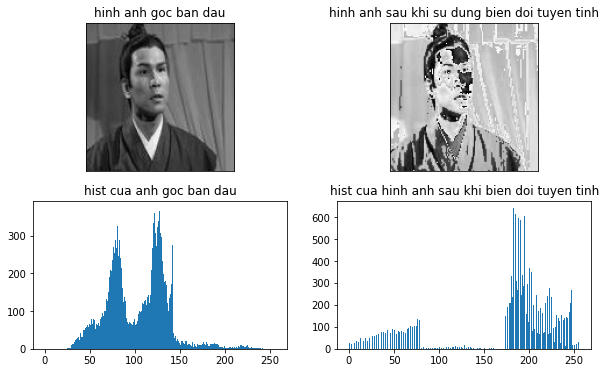

In [ ]:
img3 = copy.copy(img)
img3 = biendoiTuyenTinh(img3,1,1.5,2,70,120)

plt.figure(figsize=(10,6))
plt.subplot(221) , plt.imshow(img1,cmap="gray"), plt.title("hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(222) , plt.imshow(img3,cmap="gray"), plt.title("hinh anh sau khi su dung bien doi tuyen tinh")
plt.xticks([]), plt.yticks([])
plt.subplot(223) , plt.hist(img1.ravel(),256,[0,256]),plt.title("hist cua anh goc ban dau")
plt.subplot(224) , plt.hist(img3.ravel(),256,[0,256]),plt.title("hist cua hinh anh sau khi bien doi tuyen tinh")

plt.show()

**BIEN DOI PHI TUYEN**

Bien doi phi tuyen su dung ham log

In [ ]:
def biendoiPhiTuyen(image):
  c = 255/np.log(1+np.max(image))
  image = c* (np.log(image+1))
  return image.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


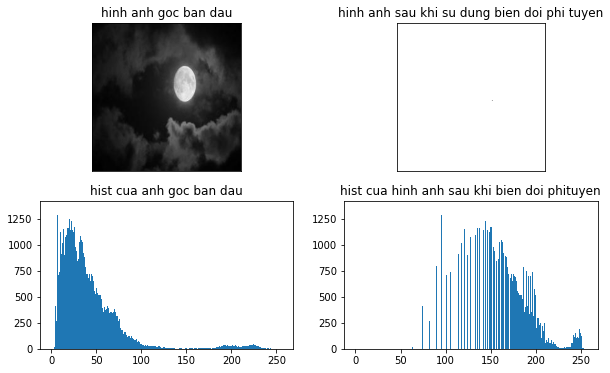

In [ ]:
anhTrang = cv2.imread('/content/drive/MyDrive/XuLyAnh/AnhTrang.jpg',0)
anhTrang1 = copy.copy(anhTrang)

anhTrang1 = biendoiPhiTuyen(anhTrang1)

plt.figure(figsize=(10,6))
plt.subplot(221) , plt.imshow(anhTrang,cmap="gray"), plt.title("hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(222) , plt.imshow(anhTrang1,cmap="gray"), plt.title("hinh anh sau khi su dung bien doi phi tuyen")
plt.xticks([]), plt.yticks([])
plt.subplot(223) , plt.hist(anhTrang.ravel(),256,[0,256]),plt.title("hist cua anh goc ban dau")
plt.subplot(224) , plt.hist(anhTrang1.ravel(),256,[0,256]),plt.title("hist cua hinh anh sau khi bien doi phituyen")

plt.show()


Bien doi phi tuyen su dung ham mu

In [ ]:
def biendoiPhiTuyen1(image,c,gama):
  image = c* np.power(image,gama)
  for i in np.arange(0,image.shape[0]):
    for j in np.arange(0,image.shape[1]):
      if image[i,j]>255:
        image[i,j] = 255
      if image[i,j]<0:
        image[i,j]=0
  return image.astype(int)

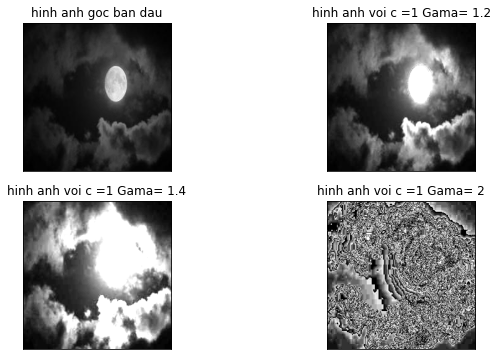

In [ ]:
anhTrang21= copy.copy(anhTrang)
anhTrang22= copy.copy(anhTrang)
anhTrang23= copy.copy(anhTrang)
anhTrang21 = biendoiPhiTuyen1(anhTrang21,1,1.2)
anhTrang22 = biendoiPhiTuyen1(anhTrang22,1,1.4)
anhTrang23 = biendoiPhiTuyen1(anhTrang23,1,2)
plt.figure(figsize=(10,6))
plt.subplot(221) , plt.imshow(anhTrang,cmap="gray"), plt.title("hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(222) , plt.imshow(anhTrang21,cmap="gray"), plt.title("hinh anh voi c =1 Gama= 1.2")
plt.xticks([]), plt.yticks([])
plt.subplot(223) , plt.imshow(anhTrang22,cmap="gray"), plt.title("hinh anh voi c =1 Gama= 1.4")
plt.xticks([]), plt.yticks([])
plt.subplot(224) , plt.imshow(anhTrang23,cmap="gray"), plt.title("hinh anh voi c =1 Gama= 2")
plt.xticks([]), plt.yticks([])

plt.show()

**BIEN DOI AM BAN**

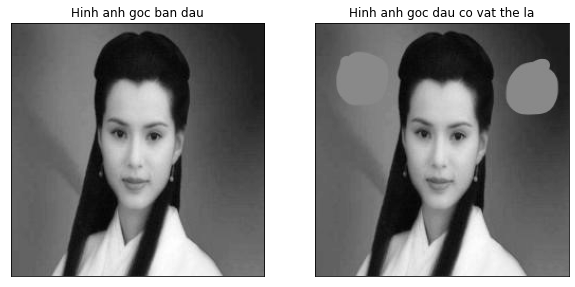

In [ ]:
image3 = cv2.imread('/content/drive/MyDrive/XuLyAnh/CoCo1.jpg')
image4 = cv2.imread('/content/drive/MyDrive/XuLyAnh/CoCo2.jpg')
image31= cv2.cvtColor(image3,cv2.COLOR_BGR2GRAY)
image41= cv2.cvtColor(image4,cv2.COLOR_BGR2GRAY)

image32= copy.copy(image31)
image42= copy.copy(image41)

plt.figure(figsize=(10,6))
plt.subplot(121) , plt.imshow(image31,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(122) , plt.imshow(image41,cmap="gray"), plt.title("Hinh anh goc dau co vat the la")
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def Amban(image):
  return 255- image

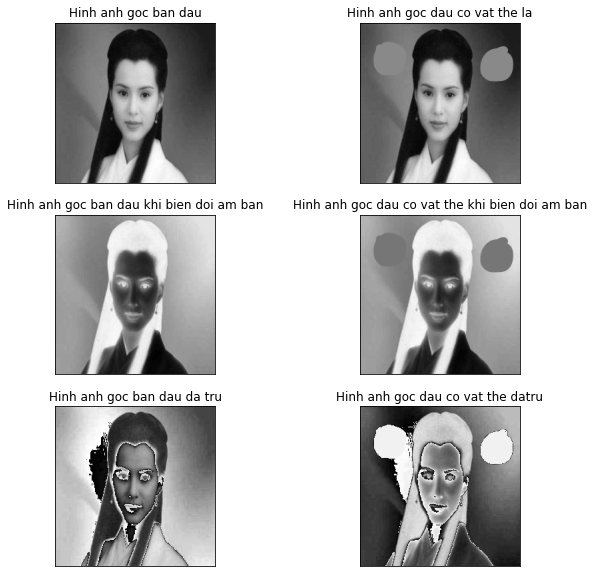

In [ ]:
image32 = Amban(image32)
image42 = Amban(image42)
image33 = image31- image32
image43= image42- image41

plt.figure(figsize=(10,10))
plt.subplot(321) , plt.imshow(image31,cmap="gray"), plt.title("Hinh anh goc ban dau")
plt.xticks([]), plt.yticks([])
plt.subplot(322) , plt.imshow(image41,cmap="gray"), plt.title("Hinh anh goc dau co vat the la")
plt.xticks([]), plt.yticks([])
plt.subplot(323) , plt.imshow(image32,cmap="gray"), plt.title("Hinh anh goc ban dau khi bien doi am ban")
plt.xticks([]), plt.yticks([])
plt.subplot(324) , plt.imshow(image42,cmap="gray"), plt.title("Hinh anh goc dau co vat the khi bien doi am ban")
plt.xticks([]), plt.yticks([])
plt.subplot(325) , plt.imshow(image33,cmap="gray"), plt.title("Hinh anh goc ban dau da tru")
plt.xticks([]), plt.yticks([])
plt.subplot(326) , plt.imshow(image43,cmap="gray"), plt.title("Hinh anh goc dau co vat the datru")
plt.xticks([]), plt.yticks([])
plt.show()

**Phát hiện đối tượng bằng kỹ thuật trừ ảnh**

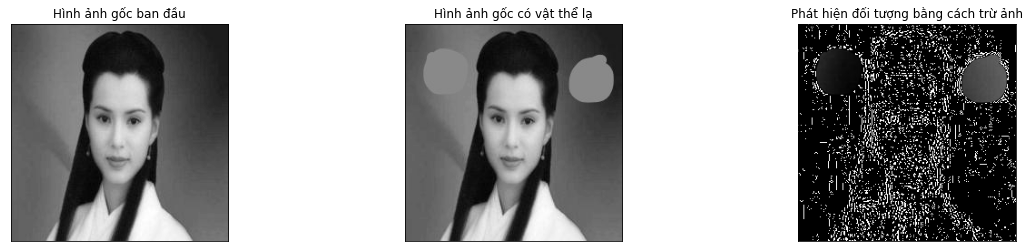

In [ ]:
imageTru = image41- image31


plt.figure(figsize=(20,4))
plt.subplot(131) , plt.imshow(image31,cmap="gray"), plt.title("Hình ảnh gốc ban đầu")
plt.xticks([]), plt.yticks([])
plt.subplot(132) , plt.imshow(image41,cmap="gray"), plt.title("Hình ảnh gốc có vật thể lạ")
plt.xticks([]), plt.yticks([])
plt.subplot(133) , plt.imshow(imageTru,cmap="gray"), plt.title("Phát hiện đối tượng bằng cách trừ ảnh")
plt.xticks([]), plt.yticks([])
plt.show()